In [1]:
#importing pandas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#reading the dataset

data=pd.read_csv("train.csv")

In [3]:
#dimensions of the dataset

data.shape

(8523, 12)

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# replacing na values with 0

data.fillna(0, inplace=True)

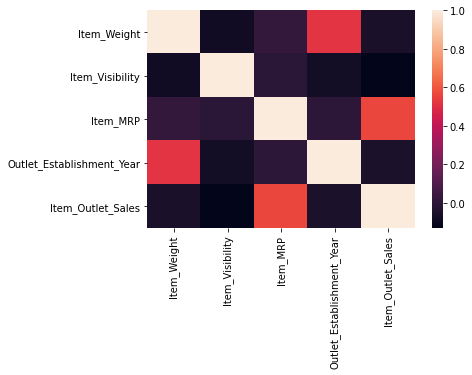

In [7]:
sns.heatmap(data.corr())

In [8]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.077522,0.022859,0.520561,-0.053222
Item_Visibility,-0.077522,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.022859,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.520561,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.053222,-0.128625,0.567574,-0.049135,1.000000


In [9]:
# dummifying string variables

data = pd.get_dummies(data)

In [10]:
data.sample(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1709,20.00,0.060023,168.7132,2002,6426.3016,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4307,6.75,0.108680,95.6752,2009,1246.3776,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3128,0.00,0.000000,190.9162,1985,5772.4860,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
806,5.82,0.080969,171.3790,2009,2037.3480,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1405,15.35,0.000000,193.0504,1999,2492.7552,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [11]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1606 entries, Item_Weight to Outlet_Type_Supermarket Type3
dtypes: float64(4), int64(1), uint8(1601)
memory usage: 13.3 MB


In [12]:
data.shape

(8523, 1606)

In [13]:
#making the train and test dataset 

train, test = train_test_split(data, test_size=0.2)

In [14]:
x_train=train.drop('Item_Outlet_Sales', axis=1)

In [15]:
y_train=train['Item_Outlet_Sales']

In [16]:
x_test=test.drop('Item_Outlet_Sales', axis=1)

In [17]:
true_p=test['Item_Outlet_Sales']

In [18]:
lreg=LinearRegression()

In [19]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
pred=lreg.predict(x_test)

In [21]:
#performance of our model -r2

lreg.score(x_test,true_p)

-492886077723591.8

In [22]:
# check if model is overfitting on train dataset

lreg.score(x_train,y_train)

0.6595258048362673

In [23]:
rmse_test = np.sqrt(np.mean(np.power((np.array(true_p)-np.array(pred)),2)))

In [24]:
rmse_train = np.sqrt(np.mean(np.power((np.array(y_train)-np.array(lreg.predict(x_train))),2)))

In [25]:
print(rmse_train)
print(rmse_test)

998.2992178347093
37483735344.692795
